In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import pandas as pd
from pathlib import Path

In [4]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100

In [5]:
old_path = Path('/app/data/raw/queues_2021_clean_data.xlsx')
assert old_path.exists()

In [6]:
new_path = Path('/app/data/raw/queues_2022_clean_data.xlsx')
assert new_path.exists()

In [7]:
old_all = pd.read_excel(old_path, sheet_name='data', parse_dates=True)
new_all = pd.read_excel(new_path, sheet_name='data', parse_dates=True)

## Comparision
We really only care about active projects, so filter for those first.

In [8]:
new = new_all.query("q_status == 'active'").copy()
old = old_all.query("q_status == 'active'").copy()

### Column Differences? No.

In [9]:
old.columns.symmetric_difference(new.columns)

Index([], dtype='object')

### 2022 is much larger, even after filtering for active projects

In [10]:
len(new) - len(old)

2114

### New categories in IA status and resource type
Some changes in nuniques disappear after .str.strip(). Still many more `ia_status_clean` and resources in `type1`. Many more NULL states for some reason.

In [11]:
for col in new.columns:
    if pd.api.types.is_object_dtype(new.loc[:, col]):
        new.loc[:, col] = new.loc[:, col].str.strip()

In [12]:
new.nunique() - old.nunique()

q_id               2140
q_status              0
q_date               53
q_year                1
ia_date              50
wd_date               4
on_date              41
entity               -1
project_name        408
developer           336
utility              65
county_1             81
county_2              5
county_3             -5
state                 1
region                0
service              -4
poi_name           1641
prop_date          -142
prop_year             1
ia_status_raw      -149
ia_status_clean      11
type_clean           -3
type1                11
type2                -1
type3                -1
mw1                  29
mw2                   0
mw3                   7
dtype: int64

Many more NULL states for some reason.

In [13]:
def categorical_change(new, old, col: str):
    comparison = (
        new[col].str.strip()
         .value_counts(dropna=False).to_frame()
         .join(old[col].value_counts(dropna=False), how='outer', rsuffix='_old')
         .assign(
             diff= lambda x: x[col].sub(x[col + '_old']),
             rel_diff=lambda x: x['diff'].div(x[col])
         )
         .sort_values('diff', ascending=False)
    )
    return comparison

In [14]:
categorical_change(new, old, 'state')

,state,state_old,diff,rel_diff
TX,997,749.0,248.0,0.248746
NaN,348,132.0,216.0,0.620690
IL,487,316.0,171.0,0.351129
AR,217,77.0,140.0,0.645161
OR,273,145.0,128.0,0.468864
IN,462,343.0,119.0,0.257576
LA,212,96.0,116.0,0.547170
PA,701,602.0,99.0,0.141227
UT,144,54.0,90.0,0.625000
AZ,357,268.0,89.0,0.249300


In [15]:
categorical_change(new, old, 'ia_status_clean')

,ia_status_clean,ia_status_clean_old,diff,rel_diff
IA Executed,1533.0,1300.0,233.0,0.151990
Construction,11.0,86.0,-75.0,-6.818182
Not Started,512.0,749.0,-237.0,-0.462891
Cluster Study,228.0,NaN,NaN,NaN
Facilities Study,2.0,NaN,NaN,NaN
Facility Study,1311.0,NaN,NaN,NaN
Feasability Study,25.0,NaN,NaN,NaN
Feasibility Study,2407.0,NaN,NaN,NaN
IA Pending,1.0,NaN,NaN,NaN
IA in Progress,2.0,NaN,NaN,NaN


In [16]:
categorical_change(new, old, 'type1')

,type1,type1_old,diff,rel_diff
Solar,6514.0,5173.0,1341.0,0.205864
Battery,2116.0,1528.0,588.0,0.277883
Wind,783.0,747.0,36.0,0.045977
Offshore Wind,123.0,93.0,30.0,0.243902
Pumped Storage,23.0,1.0,22.0,0.956522
Coal,16.0,7.0,9.0,0.562500
Hydro,56.0,53.0,3.0,0.053571
Geothermal,33.0,34.0,-1.0,-0.030303
Nuclear,15.0,19.0,-4.0,-0.266667
Gas,309.0,319.0,-10.0,-0.032362


Lots more MISO and Non-ISO West this year. Big drop in CAISO.

In [17]:
categorical_change(new, old, 'region')

,region,region_old,diff,rel_diff
MISO,1734,963,771,0.444637
West (non-ISO),1879,1201,678,0.360830
PJM,3042,2734,308,0.101249
ERCOT,902,673,229,0.253880
Southeast (non-ISO),830,708,122,0.146988
NYISO,459,385,74,0.161220
ISO-NE,350,310,40,0.114286
SPP,556,555,1,0.001799
CAISO,495,604,-109,-0.220202


### Nulls: only minor changes
Marginally more null counties, states, names, and capacities. Fewer null utilities and developers.

In [18]:
(new.isna().mean() - old.isna().mean()).sort_values(ascending=False)

county_1           0.022160
project_name       0.019160
state              0.017731
mw1                0.014406
mw2                0.011442
mw3                0.005205
ia_date            0.004647
service            0.002333
q_date             0.001926
county_3           0.001157
county_2           0.000244
poi_name           0.000242
region             0.000000
ia_status_clean    0.000000
entity             0.000000
q_id               0.000000
q_status           0.000000
q_year            -0.000203
wd_date           -0.000488
type1             -0.003052
type3             -0.003137
type_clean        -0.003443
prop_date         -0.004597
on_date           -0.004842
prop_year         -0.009409
developer         -0.014861
utility           -0.018414
ia_status_raw     -0.029981
type2             -0.038605
dtype: float64

### Uniqueness:
`q_id` is still not a unique identifier. Duplicates often differ in proposed dates and sometimes capacity.

In [19]:
new.shape

(10247, 29)

In [20]:
new['q_id'].nunique()

9713

In [21]:
candidate_keys = ('utility', 'entity', 'region')
for key in candidate_keys:
    print(f"Non-unique (q_id, {key}) pairs: {new[['q_id', key]].duplicated().sum()} (new), {old[['q_id', key]].duplicated().sum()} (old)")

Non-unique (q_id, utility) pairs: 68 (new), 64 (old)
Non-unique (q_id, entity) pairs: 71 (new), 68 (old)
Non-unique (q_id, region) pairs: 202 (new), 197 (old)


In [22]:
key = ['q_id', 'utility']
dupe_keys = new[key].duplicated(keep=False)
new.loc[dupe_keys,:].sort_values(key)

,q_id,q_status,q_date,q_year,ia_date,wd_date,on_date,entity,project_name,developer,utility,county_1,county_2,county_3,state,region,service,poi_name,prop_date,prop_year,ia_status_raw,ia_status_clean,type_clean,type1,type2,type3,mw1,mw2,mw3
9261,1.6e+11,active,7/28/2016,2016.0,NaN,NaN,NaN,LADWP,NaN,NaN,LADWP,delta,NaN,NaN,UT,West (non-ISO),NaN,IPP 345kV Switchyard,6/30/2019,2019.0,SIS restudy completed. FS finalized. HS final...,Facility Study,Solar+Battery,Solar,Battery,NaN,285.0,285.0,NaN
9266,1.6e+11,active,1/5/2016,2016.0,NaN,NaN,NaN,LADWP,NaN,NaN,LADWP,delta,NaN,NaN,UT,West (non-ISO),NaN,IPP 345kV Switchyard,1/30/2022,2022.0,SIS completed. HS completed. FS finalized. GIA...,Facility Study,Solar+Battery,Solar,Battery,NaN,400.0,400.0,NaN
9295,1.6e+11,active,1/5/2016,2016.0,NaN,NaN,NaN,LADWP,NaN,NaN,LADWP,delta,NaN,NaN,UT,West (non-ISO),NaN,IPP 345kV Switchyard,1/30/2021,2021.0,SIS completed. HS completed. FS finalized. GIA...,Facility Study,Solar+Battery,Solar,Battery,NaN,400.0,400.0,NaN
9298,1.6e+11,active,1/14/2016,2016.0,NaN,NaN,NaN,LADWP,NaN,NaN,LADWP,delta,NaN,NaN,UT,West (non-ISO),NaN,IPP 345kV Switchyard,12/31/2018,2018.0,SIS completed. HS completed. FS finalized. GIA...,Facility Study,Solar+Battery,Solar,Battery,NaN,324.0,194.0,NaN
4596,179996,active,6/8/2021,2021.0,NaN,NaN,NaN,Duke,NaN,NaN,Duke_Pr,williamsburg,NaN,NaN,SC,Southeast (non-ISO),Both,Kingstree - Sumter 115 kV,NaN,NaN,Phase 2 Cluster Study - Study Complete,System Impact Study,Solar,Solar,NaN,NaN,75.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27843,Q65*,active,11/11/2020,2020.0,NaN,NaN,NaN,SRP,NaN,NaN,SRP,maricopa,NaN,NaN,AZ,West (non-ISO),NaN,Santan 230 kV,11/1/2023,2023.0,In Progress,In Progress (unknown study),Gas,Gas,NaN,NaN,30.0,NaN,NaN
27743,Q76*,active,5/6/2021,2021.0,NaN,NaN,NaN,SRP,NaN,NaN,SRP,pinal,NaN,NaN,AZ,West (non-ISO),NaN,Pinal Central-Browning 500 kV Line,5/1/2025,2025.0,In Progress,In Progress (unknown study),Gas,Gas,NaN,NaN,392.0,NaN,NaN
27825,Q76*,active,5/6/2021,2021.0,NaN,NaN,NaN,SRP,NaN,NaN,SRP,pinal,NaN,NaN,AZ,West (non-ISO),NaN,Pinal Central-Browning 500 kV Line,5/1/2026,2026.0,In Progress,In Progress (unknown study),Gas,Gas,NaN,NaN,392.0,NaN,NaN
23404,SGI-PNM-2014-06,active,7/30/2014,2014.0,3/27/2018,NaN,NaN,PNM,NaN,NaN,PNM,NaN,NaN,NaN,NaN,West (non-ISO),NaN,NMRD Data Center LLC\nHuning Proj/Los Morros F...,12/17,NaN,NaN,IA Executed,Solar,Solar,NaN,NaN,10.0,NaN,NaN


### Capacity Comparison
New queue has noticeably fewer projects < 100 MW (41.8% vs 47.5%)

<AxesSubplot: >

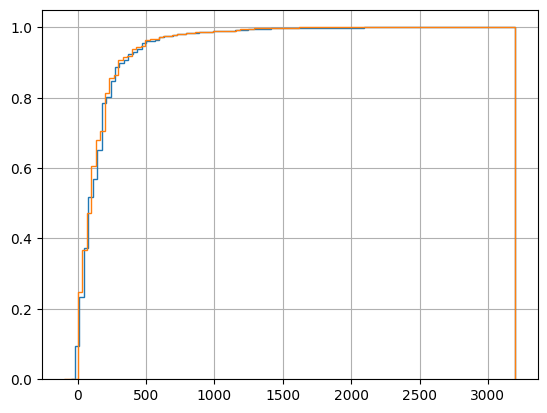

In [23]:
new['mw1'].hist(bins=100, cumulative=True, density=True, histtype='step')
old['mw1'].hist(bins=100, cumulative=True, density=True, histtype='step')

In [24]:
import numpy as np

<AxesSubplot: >

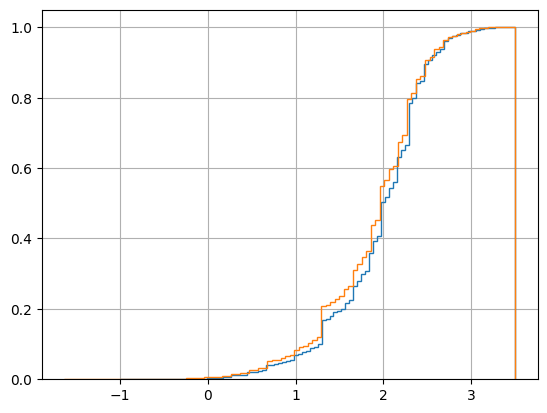

In [25]:
new['mw1'].replace(0, np.nan).transform(np.log10).hist(bins=100, cumulative=True, density=True, histtype='step')
old['mw1'].replace(0, np.nan).transform(np.log10).hist(bins=100, cumulative=True, density=True, histtype='step')

<AxesSubplot: >

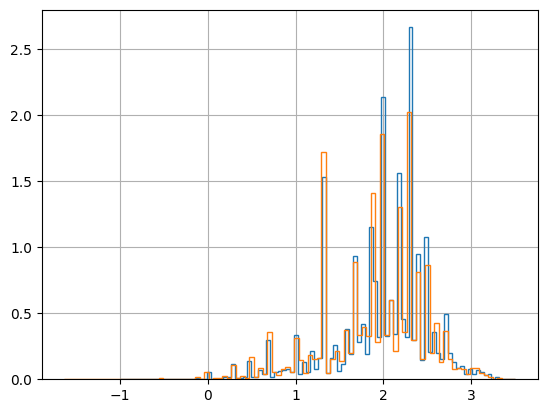

In [26]:
new['mw1'].replace(0, np.nan).transform(np.log10).hist(bins=100, density=True, histtype='step')
old['mw1'].replace(0, np.nan).transform(np.log10).hist(bins=100, density=True, histtype='step')

In [27]:
new['mw1'].lt(100).mean(), old['mw1'].lt(100).mean()

(0.41836635112715914, 0.4741177917127751)

#### Smaller Proportion of Zeros and Negatives BUT 10x more NaNs

In [28]:
new['mw1'].eq(0).agg(['mean', 'sum']), old['mw1'].eq(0).agg(['mean', 'sum'])

(mean      0.017566
 sum     180.000000
 Name: mw1, dtype: float64,
 mean      0.021148
 sum     172.000000
 Name: mw1, dtype: float64)

In [29]:
new['mw1'].lt(0).agg(['mean', 'sum']), old['mw1'].lt(0).agg(['mean', 'sum'])

(mean     0.001171
 sum     12.000000
 Name: mw1, dtype: float64,
 mean     0.001598
 sum     13.000000
 Name: mw1, dtype: float64)

In [30]:
new['mw1'].isna().agg(['mean', 'sum']), old['mw1'].isna().agg(['mean', 'sum'])

(mean      0.016005
 sum     164.000000
 Name: mw1, dtype: float64,
 mean     0.001598
 sum     13.000000
 Name: mw1, dtype: float64)

## Check Transforms

In [31]:
from dbcp.extract.lbnl_iso_queue_2021 import extract
import dbcp.transform.lbnl_iso_queue_2021 as lbnl

/app/.local/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [80]:
extracted_dfs = extract(new_path)

In [81]:
half_transformed = lbnl.active_iso_queue_projects(extracted_dfs['lbnl_iso_queue_2021'].query("queue_status == 'active'").copy())

In [74]:
new.shape, half_transformed.shape

((10247, 29), (9595, 30))

In [75]:
date_cols = [col for col in half_transformed.columns if 'date' in col]

In [76]:
half_transformed[date_cols].dtypes

queue_date_raw                      object
interconnection_date_raw            object
date_proposed_raw                   object
queue_date                  datetime64[ns]
interconnection_date        datetime64[ns]
date_proposed               datetime64[ns]
dtype: object

In [77]:
half_transformed[date_cols].isna().agg(['sum', 'mean'])

,queue_date_raw,interconnection_date_raw,date_proposed_raw,queue_date,interconnection_date,date_proposed
sum,20.000000,8928.000000,132.000000,20.000000,8941.000000,141.000000
mean,0.002084,0.930485,0.013757,0.002084,0.931839,0.014695


In [78]:
date_nan = half_transformed.loc[:, ['queue_date', 'date_proposed']].isna().any(axis=1)

In [79]:
# added date parsing for new formats: 01jan2020, 1/20, Jan-20
half_transformed.loc[date_nan, [col for col in date_cols if 'interconnection' not in col]].sample(15, random_state=1)

,queue_date_raw,date_proposed_raw,queue_date,date_proposed
project_id,,,,
1238,6/28/2022,NaN,2022-06-28,NaT
1196,6/28/2022,NaN,2022-06-28,NaT
1260,6/29/2022,NaN,2022-06-29,NaT
10093,8/31/2022,NaN,2022-08-31,NaT
1194,7/25/2018,NaN,2018-07-25,NaT
4132,6/1/2003,NaN,2003-06-01,NaT
2511,"October 14, 2016",Q2023,2016-10-14,NaT
1171,6/13/2022,NaN,2022-06-13,NaT
1228,7/6/2021,NaN,2021-07-06,NaT


In [82]:
transformed_dfs = lbnl.transform(extracted_dfs)

In [83]:
transformed_dfs.keys()

dict_keys(['iso_projects_2021', 'iso_locations_2021', 'iso_resource_capacity_2021'])

In [84]:
proj = transformed_dfs['iso_projects_2021']
loc = transformed_dfs['iso_locations_2021']
res = transformed_dfs['iso_resource_capacity_2021']

In [85]:
proj.head()

,project_id,region,queue_id,queue_status,queue_date_raw,queue_year,interconnection_date_raw,entity,project_name,developer,utility,interconnection_service_type,point_of_interconnection,date_proposed_raw,year_proposed,interconnection_status_raw,interconnection_status_lbnl,resource_type_lbnl,queue_date,interconnection_date,date_proposed
0,0,Southeast (non-ISO),GIA-40,active,10/24/2009,2009.0,NaN,AEC,NaN,NaN,AEC,Network Resource,NM Switchyard (345 kV Bus),11/1/2011,2011.0,Upgrade Approved,IA Executed,Coal,2009-10-24,NaT,2011-11-01
1,1,Southeast (non-ISO),GIA-41,active,10/24/2009,2009.0,NaN,AEC,NaN,NaN,AEC,Network Resource,TH Switchyard (161 kV Bus),11/1/2012,2012.0,Upgrade Approved,IA Executed,Coal,2009-10-24,NaT,2012-11-01
2,2,Southeast (non-ISO),GIA-96,active,10/22/2021,2021.0,NaN,AEC,NaN,NaN,AEC,Energy,Stroud 138kV,1/12/2023,2023.0,FS,Facilities Study,Wind,2021-10-22,NaT,2023-01-12
3,3,Southeast (non-ISO),GIA-77,active,1/18/2019,2019.0,NaN,AEC,NaN,NaN,AEC,Network,Chouteau 161 kV,9/28/2019,2019.0,GIA,IA Executed,Gas,2019-01-18,NaT,2019-09-28
4,4,Southeast (non-ISO),GIA-83,active,6/19/2019,2019.0,NaN,AEC,NaN,NaN,AEC,Network,McCredie 345 kV,7/1/2025,2025.0,GIA,IA Executed,Wind,2019-06-19,NaT,2025-07-01


In [86]:
loc.head()

,project_id,raw_county_name,raw_state_name,state_id_fips,county_id_fips,geocoded_locality_name,geocoded_locality_type,geocoded_containing_county
0,0,new madrid,MO,29,29143,new madrid,county,new madrid
1,1,randolph,MO,29,29175,randolph,county,randolph
2,2,lincoln,OK,40,40081,lincoln,county,lincoln
3,3,mayes,OK,40,40097,mayes,county,mayes
4,4,randolph,MO,29,29175,randolph,county,randolph


In [87]:
res.head()

,project_id,resource,capacity_mw,resource_clean
0,0,Coal,20.0,Coal
1,1,Coal,17.0,Coal
2,2,Wind,98.0,Onshore Wind
3,3,Gas,50.0,Natural Gas
4,4,Wind,1018.0,Onshore Wind


In [93]:
loc['county_id_fips'].isna().agg(['sum', 'mean'])

sum     77.000000
mean     0.008296
Name: county_id_fips, dtype: float64

In [88]:
# fixed a few unambiguous ones. There are multiple King <xxx> County, VA so I can't fix that without project-by-project research
loc[loc['county_id_fips'].isna() & loc['raw_county_name'].notna() & loc['raw_state_name'].notna()]

,project_id,raw_county_name,raw_state_name,state_id_fips,county_id_fips,geocoded_locality_name,geocoded_locality_type,geocoded_containing_county
158,164,san juan,AZ,04,<NA>,AZ,,
550,738,municipality of tecate,MX,<NA>,<NA>,,,
591,780,baja california,MX,<NA>,<NA>,,,
649,839,baja california,MX,<NA>,<NA>,,,
696,886,tecate baja california mexico,MX,<NA>,<NA>,,,
834,1032,sonora,MX,<NA>,<NA>,,,
898,1097,tecate,MX,<NA>,<NA>,,,
2809,3179,desoto,MN,27,<NA>,MN,,
3401,3792,spencer,ND,38,<NA>,ND,,
4395,4841,hurchill,N,<NA>,<NA>,US,,


In [92]:
# in principle we might be able to fix some of the missing states. A lot of these raw names should be assumed to be counties rather than cities.
loc[loc['raw_county_name'].notna() & loc['raw_state_name'].isna()].sort_values('raw_county_name')

,project_id,raw_county_name,raw_state_name,state_id_fips,county_id_fips,geocoded_locality_name,geocoded_locality_type,geocoded_containing_county
8220,9108,aiken,NaN,<NA>,<NA>,Aiken,city,Aiken County
8222,9110,aiken,NaN,<NA>,<NA>,Aiken,city,Aiken County
8229,9117,clarendon,NaN,<NA>,<NA>,Clarendon,,Arlington County
8230,9118,clarendon,NaN,<NA>,<NA>,Clarendon,,Arlington County
351,448,clark,NaN,<NA>,<NA>,Clark County,county,Clark County
440,613,coos & curry,NaN,<NA>,<NA>,US,,
8241,9128,darlington,NaN,<NA>,<NA>,Darlington,city,Darlington County
9116,10069,delta,NaN,<NA>,<NA>,US,,
9137,10090,dolores,NaN,<NA>,<NA>,Dolores County,county,Dolores County
2582,2945,duval,NaN,<NA>,<NA>,Duval County,county,Duval County


In [89]:
res.groupby('resource_clean')['capacity_mw'].sum().sort_values(ascending=False)

resource_clean
Solar              882739.09
Battery Storage    449991.57
Onshore Wind       173665.22
Offshore Wind      109067.30
Natural Gas         78328.00
Pumped Storage      12365.00
Unknown              7950.90
Hydro                4909.76
Nuclear              4847.00
Other                3256.40
Other Storage        2527.00
Geothermal           1934.10
Coal                 1284.70
Oil                   995.00
Biomass               136.75
Waste Heat            126.00
Biofuel                 6.85
Name: capacity_mw, dtype: float64

In [90]:
proj.shape, loc.shape, res.shape

((9595, 21), (9282, 8), (11794, 4))